In [1]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [2]:
X=diabetes.data
y=diabetes.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7) 

In [4]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential() #신경망 모형
model.add(Dense(24,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                264       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

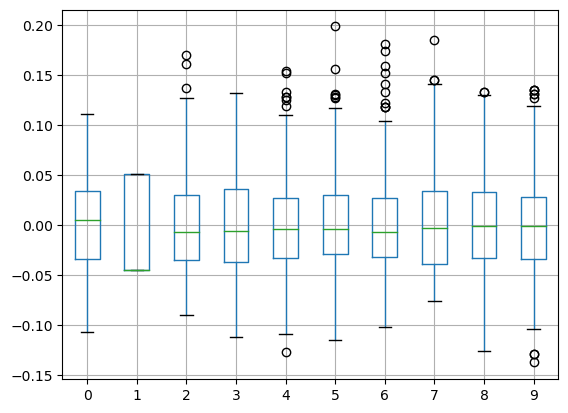

In [5]:
import pandas as pd
pd.DataFrame(X_train).boxplot()

In [6]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss', patience=50)
hist=model.fit(X_train,y_train,epochs=500,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/500
9/9 [==============================] - 1s 27ms/step - loss: 30435.3555 - mse: 30435.3555 - mae: 155.1805 - val_loss: 27678.8848 - val_mse: 27678.8848 - val_mae: 149.5165
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 30412.8906 - mse: 30412.8906 - mae: 155.1080 - val_loss: 27654.3809 - val_mse: 27654.3809 - val_mae: 149.4353
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 30385.8438 - mse: 30385.8438 - mae: 155.0222 - val_loss: 27625.9355 - val_mse: 27625.9355 - val_mae: 149.3406
Epoch 4/500
9/9 [==============================] - 0s 5ms/step - loss: 30354.0352 - mse: 30354.0352 - mae: 154.9191 - val_loss: 27591.2930 - val_mse: 27591.2930 - val_mae: 149.2251
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 30314.9141 - mse: 30314.9141 - mae: 154.7925 - val_loss: 27548.0273 - val_mse: 27548.0273 - val_mae: 149.0811
Epoch 6/500
9/9 [==============================] - 0s 6ms/step - loss: 30265.2129 - mse: 30265

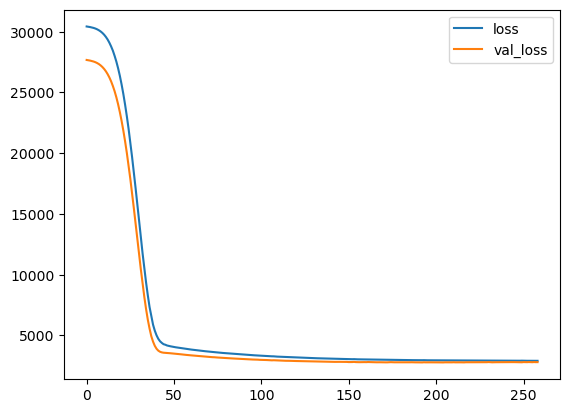

In [7]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

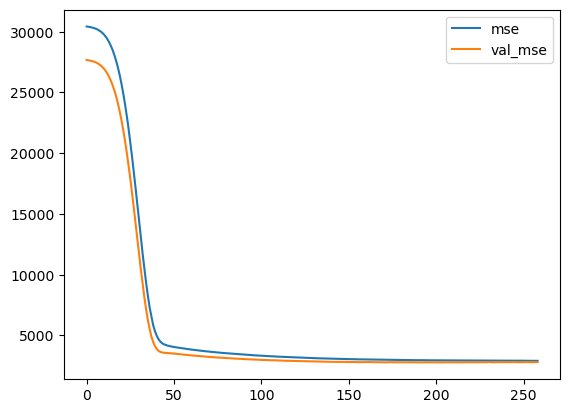

In [8]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse','val_mse'])
plt.show()

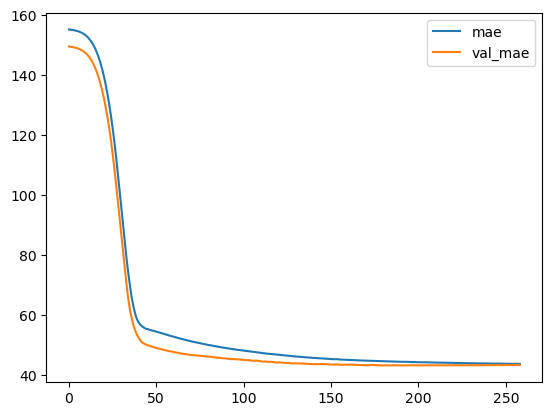

In [9]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae','val_mae'])
plt.show()

In [10]:
scores=model.evaluate(X_train,y_train)
print(scores)
scores=model.evaluate(X_test,y_test)
print(scores)

12/12 [==============================] - 0s 2ms/step - loss: 2887.4294 - mse: 2887.4294 - mae: 43.7209
[2887.429443359375, 2887.429443359375, 43.72093200683594]
3/3 [==============================] - 0s 2ms/step - loss: 2978.4810 - mse: 2978.4810 - mae: 42.4915
[2978.48095703125, 2978.48095703125, 42.49152374267578]


In [11]:
from sklearn.metrics import r2_score
pred=model.predict(X_test)
r2_score(y_test, pred)

3/3 [==============================] - 0s 1ms/step


0.40180327832693796

In [1]:
pred

NameError: name 'pred' is not defined